**This script is to read the quadricslam and oa-slam error metrics for a single scene and plot them. Only the scene variable and the path to the dataset is to be changed.**

## Import Modules

In [1]:
import matplotlib.collections as clt
import matplotlib.pyplot as plt
import ptitprince as pt
import seaborn as sns
import pandas as pd
import random
import json
import numpy as np

sns.set(style="whitegrid")

In [2]:
# can be changed according to which the plots are generated
dataset_path = "/home/allen/Desktop/RnD_Github/AllenIsaacRnD/noisy_bounding_box_experiment/"
scene = "noisy_scene"

In [3]:
## file path to quadricslam batch optimised error metrics
qslam_batch_file = dataset_path + scene + "/quadric_slam_result/error_metrics_batch.json"
## file path to quadricslam incremental optimised error metrics
qslam_incre_file = dataset_path + scene + "/quadric_slam_result/error_metrics_incre.json"
## file path to oa-slam error metrics
oaslam_file = dataset_path + scene + "/oa_slam_result/error_metrics.json"

## Reading Error Metric Files

In [4]:
with open(qslam_batch_file, 'r') as json_file:
    qslam_batch_data = json.load(json_file)
    
with open(qslam_incre_file, 'r') as json_file:
    qslam_incre_data = json.load(json_file)

with open(oaslam_file, 'r') as json_file:
    oaslam_data = json.load(json_file)

**The format of the error metrics file**

```
export_data = {'camera_pose': {
                               'euc_error': euc_errors,
                               'root_mean_square_error': rmse,
                               'rotation_error': rot_errors_traj,
                               'average_rotation_error': avg_rot_error_traj,
                               'disparity': disparity,
                               'frechet_distance': f_dist,
                               'chamfer_distance': c_dist
                                },
               'object_pose': {
                               'centroid_error': centroid_errors,
                               'average_centroid_error': avg_cen_err,
                               'rotation_error': rot_errors_obj,
                               'average_rotation_error': avg_rot_error_obj,
                               'volume_of_intersection': intersection_percent,
                               'average_volume_of_intersection': avg_int_per,
                               'volume_of_intersection_aligned': intersection_percent_aligned,
                               'average_volume_of_intersection_aligned': avg_int_per_aligned,
                               'labels': labels
                                }
               }
```

## Rainfall Plot Function

In [5]:
# df is the the pandas dataframe containing three columns
# 'Scene', 'Error' and 'Plot'.
# 'Scene' is the scene id in string format
# 'Error' is the error values for that particular scene. This would be displayed as legend
# 'Plot' is the x axis label
# dy is the label
# ax is the axis
def rain_plot(df: pd.core.frame.DataFrame, dy: str, ax):
    ## assuming there would be maximum of 12 scenes
    pal = ["#FF0000", "#00FF00", "#0000FF", "#FFFF00", "#FFA500",
           "#800080", "#FFC0CB", "#A52A2A", "#00FFFF", "#808080",
           "#000000", "#F0F0F0"]
    
    dx = "Plot"
    ort = "v"
    
    # half violin plot
    ax = pt.half_violinplot(x=dx, y=dy, data=df, palette=pal, bw=.2, cut=0.,
                             scale="area", width=.6, inner=None, orient=ort)
    
    # the scattered points
    ax = sns.stripplot(x=dx, y=dy, data=df, palette=pal, edgecolor="white",
                       size=7, jitter=1, zorder=0, hue=df.columns[0], orient=ort, alpha=1)

    # the box with whiskers
    ax = sns.boxplot(x=dx, y=dy, data=df, color="black", width=.15, zorder=10,
                     showcaps=True, boxprops={'facecolor': 'none', "zorder": 10},
                     showfliers=True, whiskerprops={'linewidth': 2, "zorder": 10},
                     saturation=1, orient=ort)

    ax.set_xlabel('')
    # if the x axis label needs to be tilted
    #plt.xticks(rotation=0, ha='right')
    
    # the 'Scene' column is added as the legend
    ax.legend(title=df.columns[0], bbox_to_anchor=(1.05, 1), loc='upper left')

### An example

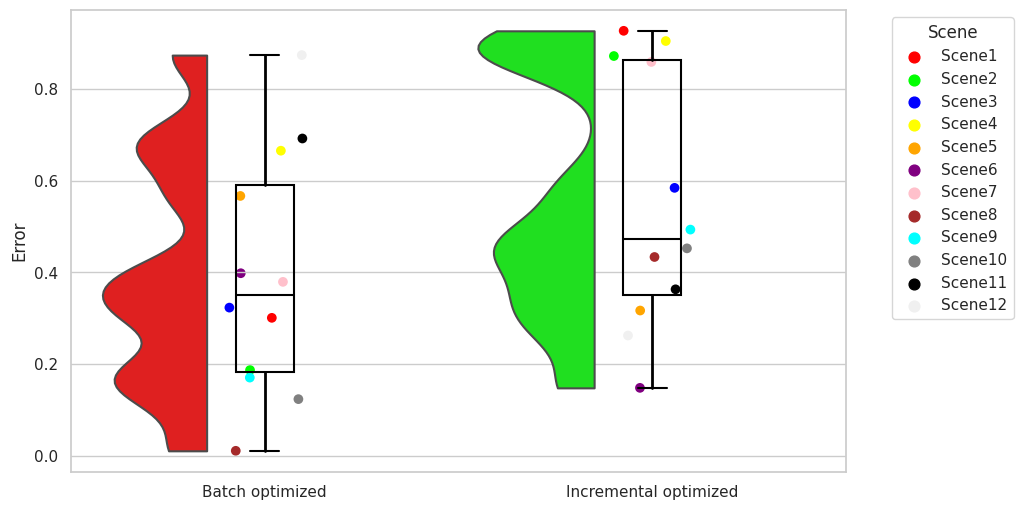

In [6]:
# Generating example data
np.random.seed(60)
data = {'Scene': [f'Scene{i}' for i in range(1, 13)],
        'Error': np.random.random(12),
         'Plot': ['Batch optimized']*12}
df1 = pd.DataFrame(data)
np.random.seed(70)
data = {'Scene': [f'Scene{i}' for i in range(1, 13)],
        'Error': np.random.random(12),
        'Plot': ['Incremental optimized']*12}
df2 = pd.DataFrame(data)
df = pd.concat([df1, df2], ignore_index=True)

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

rain_plot(df, "Error", ax)

plt.show()

# PLOTS

## TRAJECTORY

### 1. RMSE for Trajectory Deviation - Single scene, 3 line plots

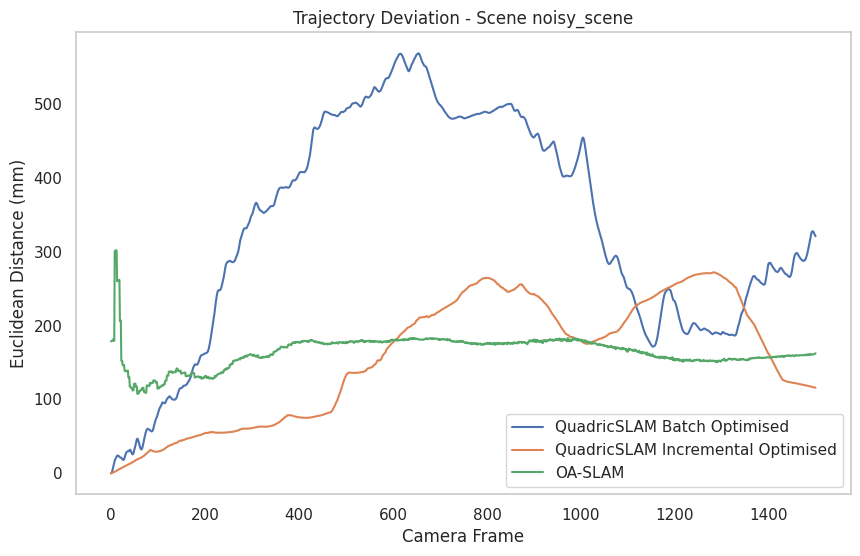

In [7]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

ax.plot([i for i in range(len(qslam_batch_data['camera_pose']['euc_error']))],
        qslam_batch_data['camera_pose']['euc_error'], label='QuadricSLAM Batch Optimised')

ax.plot([i for i in range(len(qslam_incre_data['camera_pose']['euc_error']))],
        qslam_incre_data['camera_pose']['euc_error'], label='QuadricSLAM Incremental Optimised')

ax.plot([i for i in range(len(oaslam_data['camera_pose']['euc_error']))],
        oaslam_data['camera_pose']['euc_error'], label='OA-SLAM')


ax.set_xlabel('Camera Frame')
ax.set_ylabel('Euclidean Distance (mm)')

plt.title("Trajectory Deviation - Scene " + scene)

plt.legend()
plt.grid(False)
plt.show()

### 2. Average Rotation Error for Camera Poses - Single scene, 3 line plots

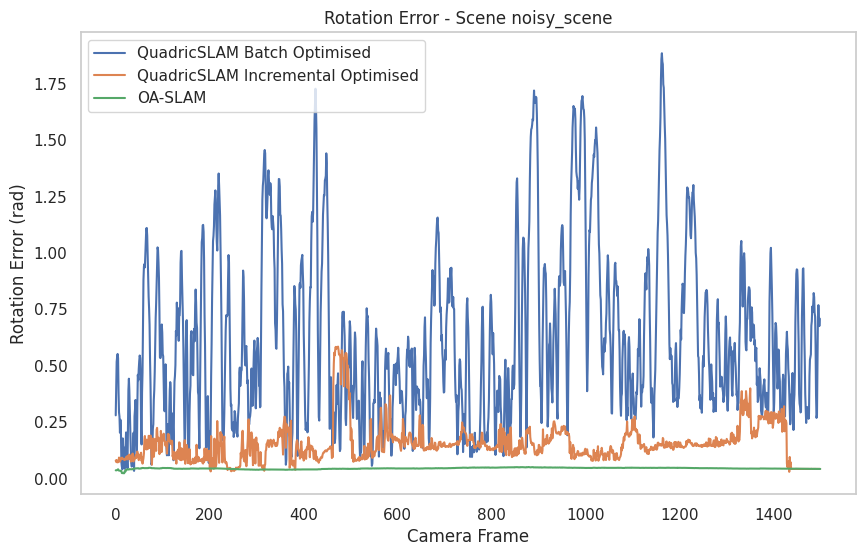

In [8]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

ax.plot([i for i in range(len(qslam_batch_data['camera_pose']['rotation_error']))],
        qslam_batch_data['camera_pose']['rotation_error'], label='QuadricSLAM Batch Optimised')

ax.plot([i for i in range(len(qslam_incre_data['camera_pose']['rotation_error']))],
        qslam_incre_data['camera_pose']['rotation_error'], label='QuadricSLAM Incremental Optimised')

ax.plot([i for i in range(len(oaslam_data['camera_pose']['rotation_error']))],
        oaslam_data['camera_pose']['rotation_error'], label='OA-SLAM')


ax.set_xlabel('Camera Frame')
ax.set_ylabel('Rotation Error (rad)')

plt.title("Rotation Error - Scene " + scene)

plt.legend()
plt.grid(False)
plt.show()

## OBJECT

### 1. Centroid Error - Single Scene, 3 rainfall plots

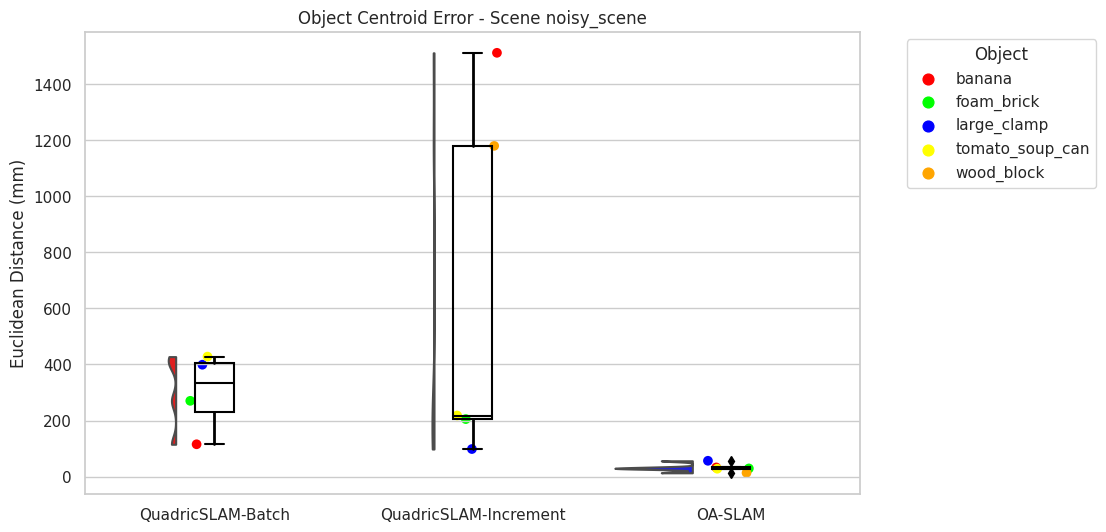

In [9]:
########## All On Same Plot ##########


## QuadricSLAM Batch Optimized
length = len(qslam_batch_data['object_pose']['centroid_error'])
data = {'Object': qslam_batch_data['object_pose']['labels'][0:length],
        'Error': qslam_batch_data['object_pose']['centroid_error'],
         'Plot': ['QuadricSLAM-Batch']*length}
df1 = pd.DataFrame(data)

## QuadricSLAM Incremental Optimized
data = {'Object': qslam_incre_data['object_pose']['labels'],
        'Error': qslam_incre_data['object_pose']['centroid_error'],
         'Plot': ['QuadricSLAM-Increment']*len(qslam_incre_data['object_pose']['labels'])}
df2 = pd.DataFrame(data)

## OA-SLAM
data = {'Object': oaslam_data['object_pose']['labels'],
        'Error': oaslam_data['object_pose']['centroid_error'],
         'Plot': ['OA-SLAM']*len(oaslam_data['object_pose']['labels'])}

df3 = pd.DataFrame(data)

df = pd.concat([df1, df2, df3], ignore_index=True)

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

rain_plot(df, "Error", ax)

ax.set_ylabel('Euclidean Distance (mm)')

plt.title("Object Centroid Error - Scene " + scene)
plt.show()

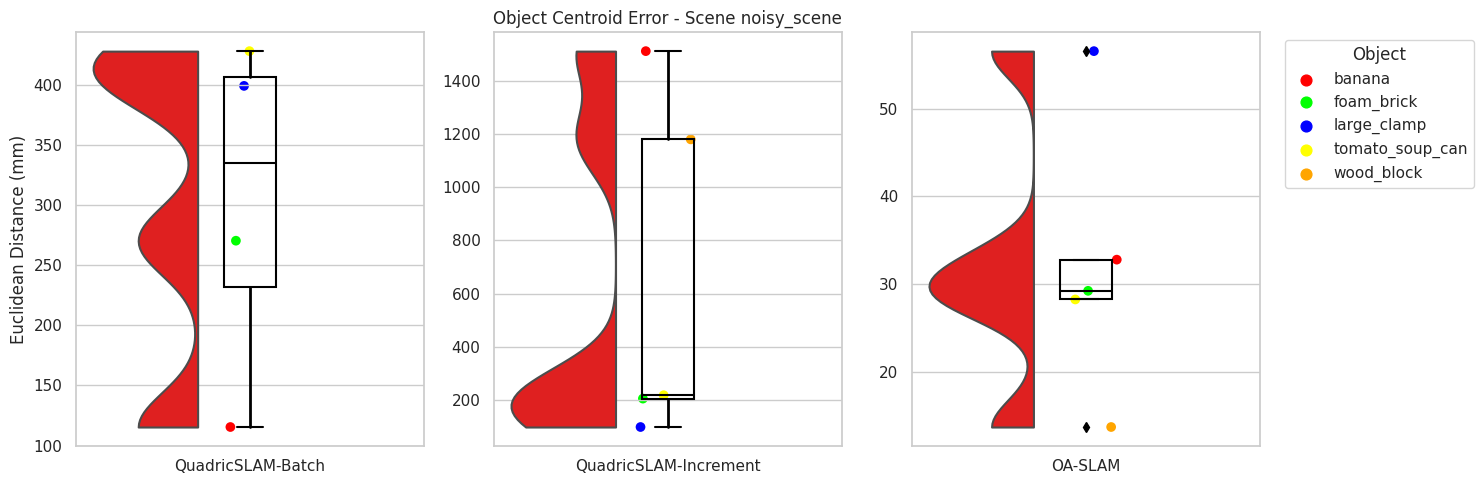

In [10]:
########## All On Three Plots ##########

# Create a figure and manually create subplots
fig = plt.figure(figsize=(15, 5))

# Create three subplots in a single row
ax1 = plt.subplot(1, 3, 1)
rain_plot(df1, "Error", ax1)
ax1.get_legend().remove()
ax1.set_ylabel('Euclidean Distance (mm)')

ax2 = plt.subplot(1, 3, 2)
rain_plot(df2, "Error", ax2)
ax2.set_title("Object Centroid Error - Scene " + scene)
ax2.get_legend().remove()
ax2.set_ylabel('')

ax3 = plt.subplot(1, 3, 3)
rain_plot(df3, "Error", ax3)
ax3.set_ylabel('')


plt.tight_layout()
plt.show()

### 2. Average Rotation Error - Single Scene, 3 rainfall plots

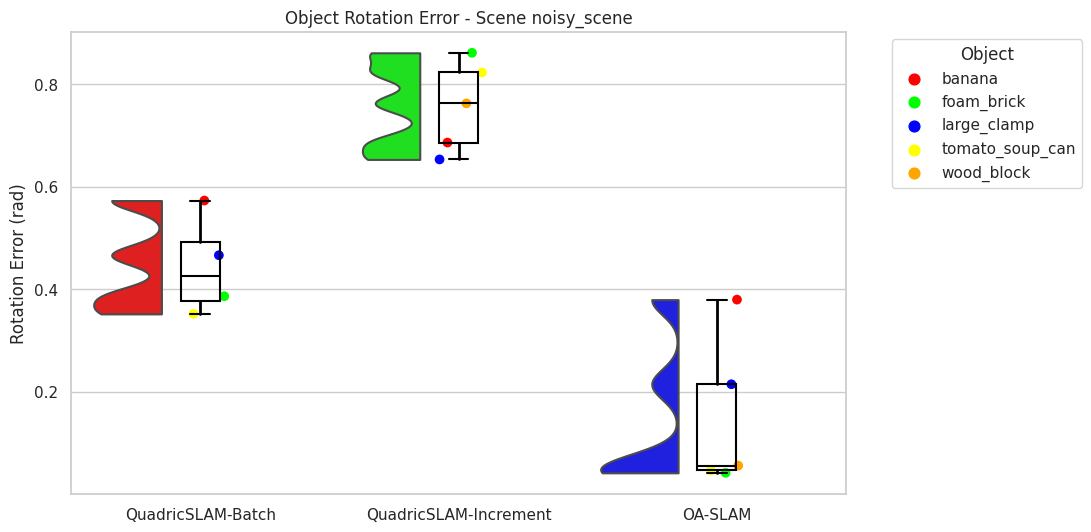

In [11]:
########## All On Same Plot ##########


## QuadricSLAM Batch Optimized
data = {'Object': qslam_batch_data['object_pose']['labels'][0:length],
        'Error': qslam_batch_data['object_pose']['rotation_error'],
         'Plot': ['QuadricSLAM-Batch']*length}
df1 = pd.DataFrame(data)

## QuadricSLAM Incremental Optimized
data = {'Object': qslam_incre_data['object_pose']['labels'],
        'Error': qslam_incre_data['object_pose']['rotation_error'],
         'Plot': ['QuadricSLAM-Increment']*len(qslam_incre_data['object_pose']['labels'])}
df2 = pd.DataFrame(data)

## OA-SLAM
data = {'Object': oaslam_data['object_pose']['labels'],
        'Error': oaslam_data['object_pose']['rotation_error'],
         'Plot': ['OA-SLAM']*len(oaslam_data['object_pose']['labels'])}

df3 = pd.DataFrame(data)

df = pd.concat([df1, df2, df3], ignore_index=True)

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

rain_plot(df, "Error", ax)

ax.set_ylabel('Rotation Error (rad)')

plt.title("Object Rotation Error - Scene " + scene)
plt.show()

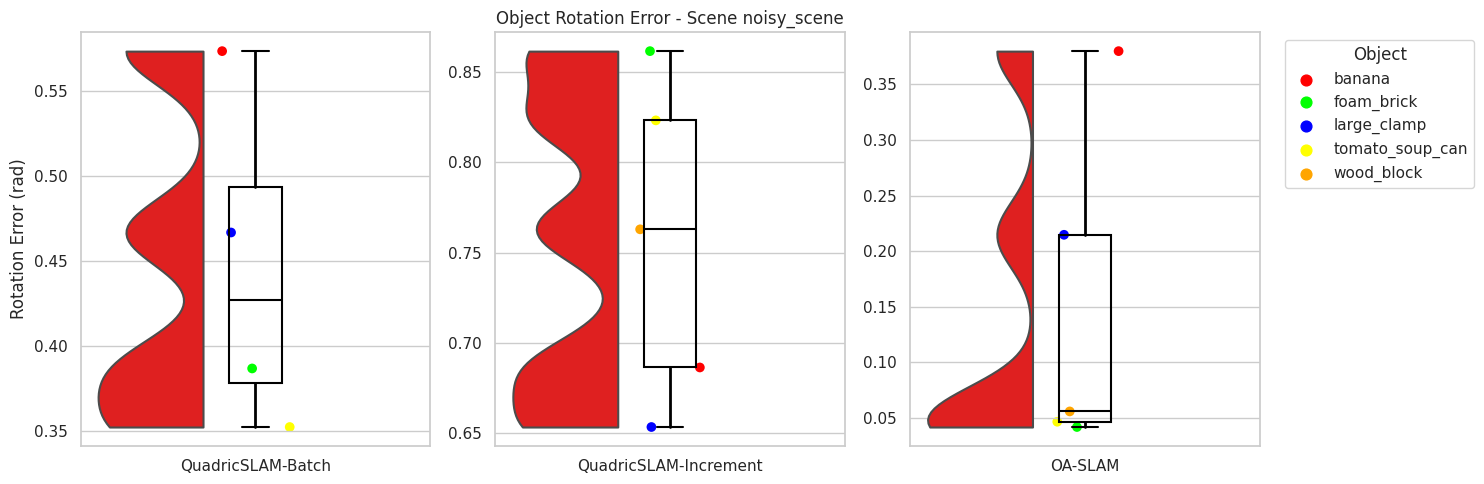

In [12]:
########## All On Three Plots ##########

# Create a figure and manually create subplots
fig = plt.figure(figsize=(15, 5))

# Create three subplots in a single row
ax1 = plt.subplot(1, 3, 1)
rain_plot(df1, "Error", ax1)
ax1.get_legend().remove()
ax1.set_ylabel('Rotation Error (rad)')

ax2 = plt.subplot(1, 3, 2)
rain_plot(df2, "Error", ax2)
ax2.set_title("Object Rotation Error - Scene " + scene)
ax2.get_legend().remove()
ax2.set_ylabel('')

ax3 = plt.subplot(1, 3, 3)
rain_plot(df3, "Error", ax3)
ax3.set_ylabel('')


plt.tight_layout()
plt.show()

### 3. Percentage of Intersection Volume - Single Scene, 3 rainfall plots

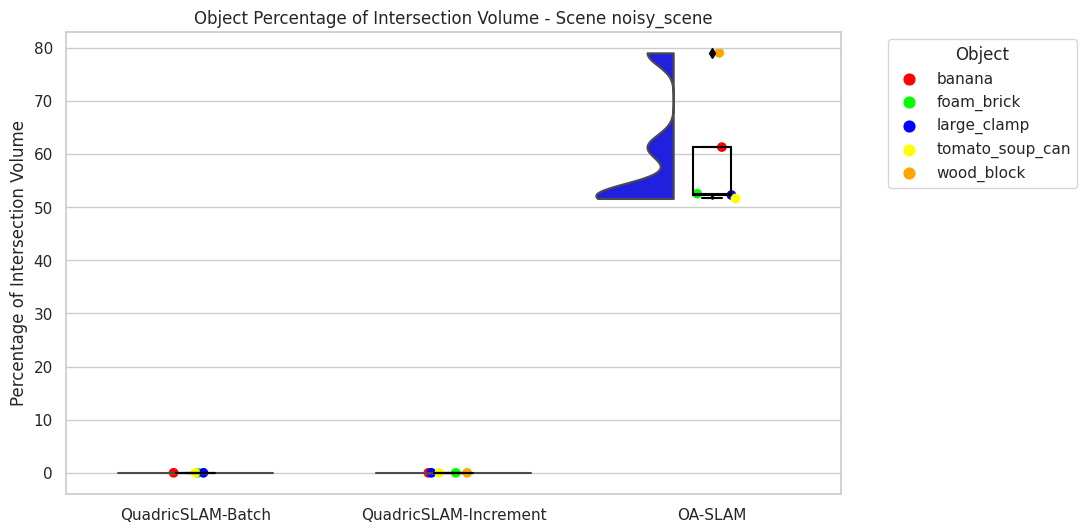

In [13]:
########## All On Same Plot ##########


## QuadricSLAM Batch Optimized
data = {'Object': qslam_batch_data['object_pose']['labels'][0:length],
        'Error': qslam_batch_data['object_pose']['volume_of_intersection'],
         'Plot': ['QuadricSLAM-Batch']*length}
df1 = pd.DataFrame(data)

## QuadricSLAM Incremental Optimized
data = {'Object': qslam_incre_data['object_pose']['labels'],
        'Error': qslam_incre_data['object_pose']['volume_of_intersection'],
         'Plot': ['QuadricSLAM-Increment']*len(qslam_incre_data['object_pose']['labels'])}
df2 = pd.DataFrame(data)

## OA-SLAM
data = {'Object': oaslam_data['object_pose']['labels'],
        'Error': oaslam_data['object_pose']['volume_of_intersection'],
         'Plot': ['OA-SLAM']*len(oaslam_data['object_pose']['labels'])}

df3 = pd.DataFrame(data)

df = pd.concat([df1, df2, df3], ignore_index=True)

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

rain_plot(df, "Error", ax)

ax.set_ylabel('Percentage of Intersection Volume')

plt.title("Object Percentage of Intersection Volume - Scene " + scene)
plt.show()

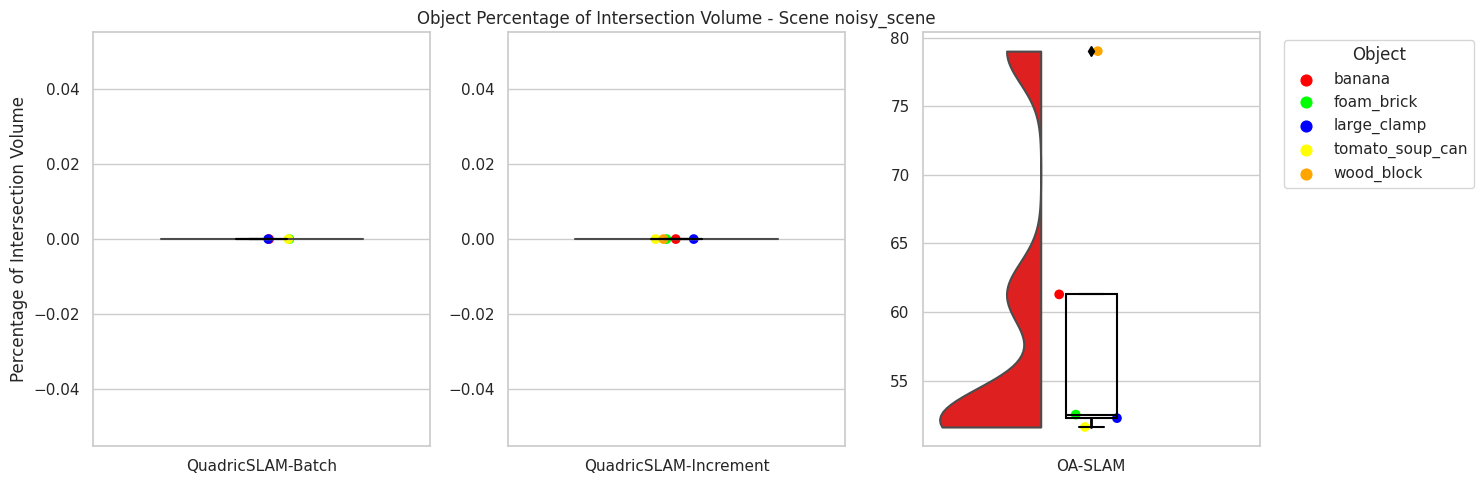

In [14]:
########## All On Three Plots ##########

# Create a figure and manually create subplots
fig = plt.figure(figsize=(15, 5))

# Create three subplots in a single row
ax1 = plt.subplot(1, 3, 1)
rain_plot(df1, "Error", ax1)
ax1.get_legend().remove()
ax1.set_ylabel('Percentage of Intersection Volume')

ax2 = plt.subplot(1, 3, 2)
rain_plot(df2, "Error", ax2)
ax2.set_title("Object Percentage of Intersection Volume - Scene " + scene)
ax2.get_legend().remove()
ax2.set_ylabel('')

ax3 = plt.subplot(1, 3, 3)
rain_plot(df3, "Error", ax3)
ax3.set_ylabel('')


plt.tight_layout()
plt.show()

### 4. Percentage of Aligned Intersection Volume - Single Scene, 3 rainfall plots

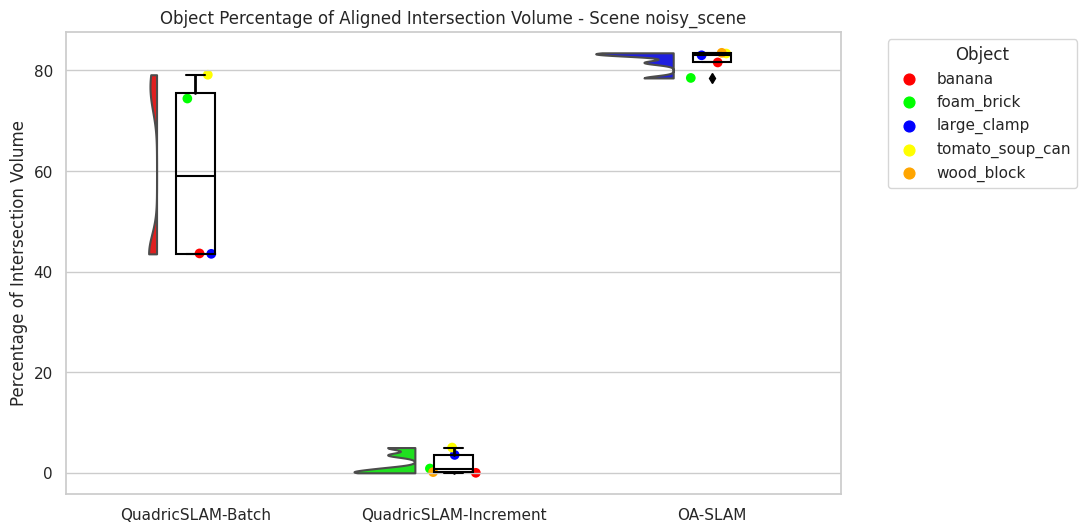

In [15]:
########## All On Same Plot ##########


## QuadricSLAM Batch Optimized
data = {'Object': qslam_batch_data['object_pose']['labels'][0:length],
        'Error': qslam_batch_data['object_pose']['volume_of_intersection_aligned'],
         'Plot': ['QuadricSLAM-Batch']*length}
df1 = pd.DataFrame(data)

## QuadricSLAM Incremental Optimized
data = {'Object': qslam_incre_data['object_pose']['labels'],
        'Error': qslam_incre_data['object_pose']['volume_of_intersection_aligned'],
         'Plot': ['QuadricSLAM-Increment']*len(qslam_incre_data['object_pose']['labels'])}
df2 = pd.DataFrame(data)

## OA-SLAM
data = {'Object': oaslam_data['object_pose']['labels'],
        'Error': oaslam_data['object_pose']['volume_of_intersection_aligned'],
         'Plot': ['OA-SLAM']*len(oaslam_data['object_pose']['labels'])}

df3 = pd.DataFrame(data)

df = pd.concat([df1, df2, df3], ignore_index=True)

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

rain_plot(df, "Error", ax)

ax.set_ylabel('Percentage of Intersection Volume')

plt.title("Object Percentage of Aligned Intersection Volume - Scene " + scene)
plt.show()

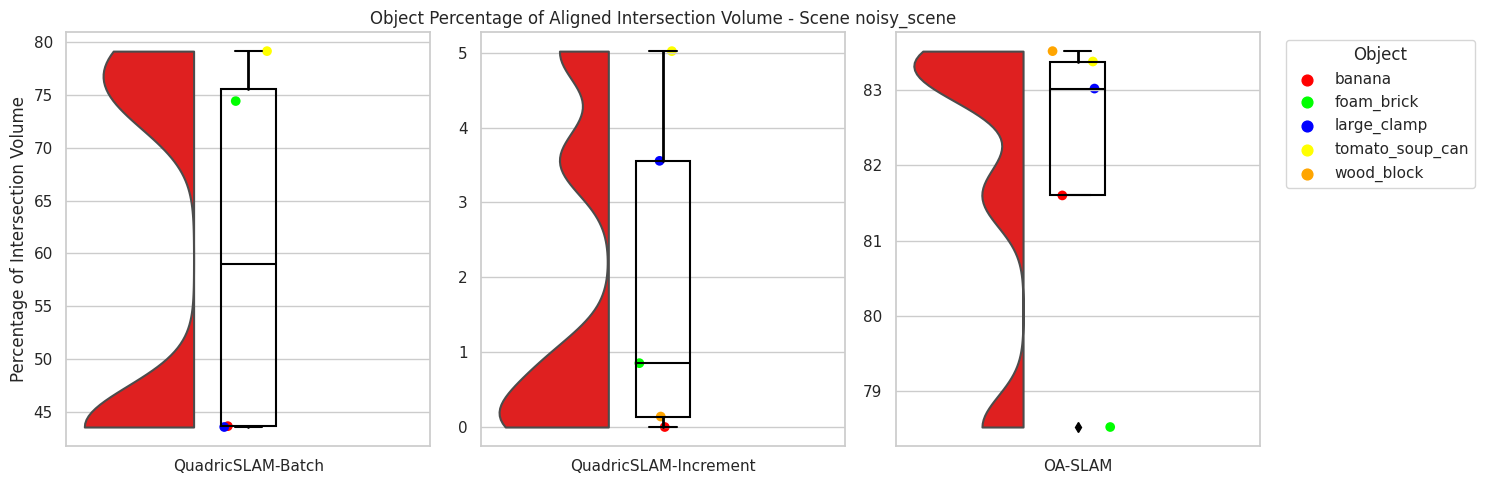

In [16]:
########## All On Three Plots ##########

# Create a figure and manually create subplots
fig = plt.figure(figsize=(15, 5))

# Create three subplots in a single row
ax1 = plt.subplot(1, 3, 1)
rain_plot(df1, "Error", ax1)
ax1.get_legend().remove()
ax1.set_ylabel('Percentage of Intersection Volume')

ax2 = plt.subplot(1, 3, 2)
rain_plot(df2, "Error", ax2)
ax2.set_title("Object Percentage of Aligned Intersection Volume - Scene " + scene)
ax2.get_legend().remove()
ax2.set_ylabel('')

ax3 = plt.subplot(1, 3, 3)
rain_plot(df3, "Error", ax3)
ax3.set_ylabel('')


plt.tight_layout()
plt.show()